In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Thay đổi đường dẫn của tệp CSV thành đường dẫn thực tế của bạn
file_path = 'D:/Study/Ma_Nguon_mo/bai_cuoi_ki/data_label_done.csv'

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị dữ liệu trong DataFrame
df.head()

,LotShape,LandContour,Utilities,LandSlope,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,3,3,2,CollgCr,7,2003,2003,196,3,...,0,0,0,0,1,0,0,0,1,0
1,3,3,3,2,Veenker,6,1976,1976,0,2,...,0,0,0,0,1,0,0,0,1,0
2,2,3,3,2,CollgCr,7,2001,2002,162,3,...,0,0,0,0,1,0,0,0,1,0
3,2,3,3,2,Crawfor,7,1915,1970,0,2,...,0,0,0,0,1,0,0,0,0,0
4,2,3,3,2,NoRidge,8,2000,2000,350,3,...,0,0,0,0,1,0,0,0,1,0


In [3]:
df.columns

Index(['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'Neighborhood',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=146)

# Chia tập train_test

In [4]:
# Separate features (X) and labels (y)
X = df.drop(['Neighborhood', 'SalePrice', 'PriceCategory'], axis=1)
y = df['PriceCategory']

In [5]:
def mixup(X, y, alpha=0.2):
    lam = np.random.beta(alpha, alpha)
    mixup_image = lam * X + (1 - lam) * X[::-1]
    mixup_label = lam * y + (1 - lam) * y[::-1]
    return mixup_image, mixup_label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Áp dụng hàm mixup cho tập huấn luyện
X_train_mixup, y_train_mixup = mixup(X_train, y_train)

# Model Decision Tree

In [7]:
# Create a decision tree model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train_mixup, y_train_mixup)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7689655172413793


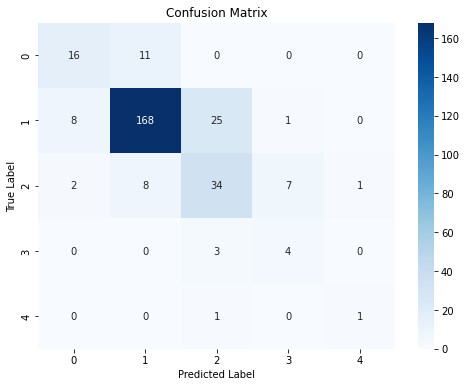

In [8]:
# Tạo Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Hiển thị Confusion Matrix bằng heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [9]:
# Hiển thị Báo cáo phân loại
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.59      0.60        27
           1       0.90      0.83      0.86       202
           2       0.54      0.65      0.59        52
           3       0.33      0.57      0.42         7
           4       0.50      0.50      0.50         2

    accuracy                           0.77       290
   macro avg       0.58      0.63      0.60       290
weighted avg       0.79      0.77      0.78       290



In [10]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")

Cross-Validation Scores: [0.73448276 0.74482759 0.76551724 0.72318339 0.71626298]
Mean Accuracy: 0.7368547905977807
